__Bu projede NBA'deki oyun,oyun detayları,takımlar,arenalar oyun tipleri oyuncular,yıllar ve daha fazasını barındıran bir datanın takımların evlerindeki başarısı ve genel sıralaması ele alınmaktadır.__

In [ ]:
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sb
mp.rcParams['figure.figsize'] = (20,10) #boyut büyütme yaptık

__Dosya okuma işlemirini ayrı ayrı yaparak describe metodu ile detaylı bilgi alıp shape işlemi ile sütun satır verisi elde ettik,NaN verileri kaldırdık__

In [27]:
games = pd.read_csv("games.csv")
games.dropna(inplace=True)
games.head()


,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2022-03-12,22101005,Final,1610612748,1610612750,2021,1610612748,104.0,0.398,0.760,...,23.0,53.0,1610612750,113.0,0.422,0.875,0.357,21.0,46.0,0
1,2022-03-12,22101006,Final,1610612741,1610612739,2021,1610612741,101.0,0.443,0.933,...,20.0,46.0,1610612739,91.0,0.419,0.824,0.208,19.0,40.0,1
2,2022-03-12,22101007,Final,1610612759,1610612754,2021,1610612759,108.0,0.412,0.813,...,28.0,52.0,1610612754,119.0,0.489,1.000,0.389,23.0,47.0,0
3,2022-03-12,22101008,Final,1610612744,1610612749,2021,1610612744,122.0,0.484,0.933,...,33.0,55.0,1610612749,109.0,0.413,0.696,0.386,27.0,39.0,1
4,2022-03-12,22101009,Final,1610612743,1610612761,2021,1610612743,115.0,0.551,0.750,...,32.0,39.0,1610612761,127.0,0.471,0.760,0.387,28.0,50.0,0


In [6]:
games.shape

(25796, 21)

In [7]:
games.describe()

,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
count,2.579600e+04,2.579600e+04,2.579600e+04,25796.000000,2.579600e+04,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,2.579600e+04,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25796.000000
mean,2.169208e+07,1.610613e+09,1.610613e+09,2011.798341,1.610613e+09,103.106044,0.460313,0.759705,0.355896,22.736779,43.345799,1.610613e+09,100.294120,0.449265,0.758082,0.349413,21.403899,42.085146,0.587494
std,5.496041e+06,8.638857e+00,8.654846e+00,5.397985,8.638857e+00,13.174726,0.056629,0.100692,0.111940,5.177566,6.621832,8.654846e+00,13.343016,0.055528,0.103418,0.110194,5.140897,6.526951,0.492295
min,1.030000e+07,1.610613e+09,1.610613e+09,2003.000000,1.610613e+09,36.000000,0.250000,0.143000,0.000000,6.000000,15.000000,1.610613e+09,33.000000,0.244000,0.143000,0.000000,4.000000,19.000000,0.000000
25%,2.060109e+07,1.610613e+09,1.610613e+09,2007.000000,1.610613e+09,94.000000,0.421000,0.696000,0.286000,19.000000,39.000000,1.610613e+09,91.000000,0.412000,0.692000,0.278000,18.000000,38.000000,0.000000
50%,2.120040e+07,1.610613e+09,1.610613e+09,2012.000000,1.610613e+09,103.000000,0.459000,0.765000,0.355000,23.000000,43.000000,1.610613e+09,100.000000,0.448000,0.765000,0.350000,21.000000,42.000000,1.000000
75%,2.170070e+07,1.610613e+09,1.610613e+09,2016.000000,1.610613e+09,112.000000,0.500000,0.829000,0.429000,26.000000,48.000000,1.610613e+09,109.000000,0.487000,0.833000,0.420000,25.000000,46.000000,1.000000
max,5.200021e+07,1.610613e+09,1.610613e+09,2021.000000,1.610613e+09,168.000000,0.684000,1.000000,1.000000,50.000000,72.000000,1.610613e+09,168.000000,0.687000,1.000000,1.000000,46.000000,81.000000,1.000000


In [29]:
game_details = pd.read_csv("games_details.csv")
game_details.fillna("", inplace=True)
game_details.head()

C:\Users\Ceren\AppData\Local\Temp/ipykernel_10272/1738283353.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  game_details = pd.read_csv("games_details.csv")


,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22101005,1610612750,MIN,Minnesota,1630162,Anthony Edwards,Anthony,F,,36:22,...,0.0,8.0,8.0,5.0,3.0,1.0,1.0,1.0,15.0,5.0
1,22101005,1610612750,MIN,Minnesota,1630183,Jaden McDaniels,Jaden,F,,23:54,...,2.0,4.0,6.0,0.0,0.0,2.0,2.0,6.0,14.0,10.0
2,22101005,1610612750,MIN,Minnesota,1626157,Karl-Anthony Towns,Karl-Anthony,C,,25:17,...,1.0,9.0,10.0,0.0,0.0,0.0,3.0,4.0,15.0,14.0
3,22101005,1610612750,MIN,Minnesota,1627736,Malik Beasley,Malik,G,,30:52,...,0.0,3.0,3.0,1.0,1.0,0.0,1.0,4.0,12.0,20.0
4,22101005,1610612750,MIN,Minnesota,1626156,D'Angelo Russell,D'Angelo,G,,33:46,...,0.0,6.0,6.0,9.0,1.0,0.0,5.0,0.0,14.0,17.0


In [9]:
game_details.shape

(645953, 29)

In [10]:
game_details.describe()

,GAME_ID,TEAM_ID,PLAYER_ID,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
count,6.459530e+05,6.459530e+05,6.459530e+05,540350.000000,540350.000000,540350.000000,540350.000000,540350.000000,540350.000000,540350.000000,...,540350.000000,540350.000000,540350.000000,540350.000000,540350.000000,540350.000000,540350.000000,540350.000000,540350.000000,516689.000000
mean,2.165952e+07,1.610613e+09,3.716935e+05,3.582408,7.891298,0.416203,0.765731,2.151618,0.199166,1.734931,...,1.026770,3.032875,4.059645,2.097692,0.722541,0.461377,1.321897,2.003018,9.665469,-0.000505
std,5.569116e+06,8.650314e+00,7.348620e+06,3.023962,5.665752,0.251634,1.216917,2.547737,0.289447,2.353475,...,1.400243,2.687996,3.486507,2.473238,0.973573,0.863525,1.402182,1.503081,8.056629,10.640185
min,1.030000e+07,1.610613e+09,1.500000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-57.000000
25%,2.060113e+07,1.610613e+09,2.435000e+03,1.000000,3.000000,0.263000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,-7.000000
50%,2.120062e+07,1.610613e+09,2.011560e+05,3.000000,7.000000,0.429000,0.000000,1.000000,0.000000,1.000000,...,1.000000,2.000000,3.000000,1.000000,0.000000,0.000000,1.000000,2.000000,8.000000,0.000000
75%,2.170079e+07,1.610613e+09,2.031240e+05,5.000000,11.000000,0.571000,1.000000,4.000000,0.375000,3.000000,...,2.000000,4.000000,6.000000,3.000000,1.000000,1.000000,2.000000,3.000000,14.000000,6.000000
max,5.200021e+07,1.610613e+09,1.962938e+09,28.000000,50.000000,1.000000,14.000000,24.000000,1.000000,26.000000,...,18.000000,25.000000,31.000000,25.000000,10.000000,12.000000,12.000000,15.000000,81.000000,57.000000


In [30]:
players = pd.read_csv("players.csv")
players.dropna(inplace=True)
players.head()

,PLAYER_NAME,TEAM_ID,PLAYER_ID,SEASON
0,Royce O'Neale,1610612762,1626220,2019
1,Bojan Bogdanovic,1610612762,202711,2019
2,Rudy Gobert,1610612762,203497,2019
3,Donovan Mitchell,1610612762,1628378,2019
4,Mike Conley,1610612762,201144,2019


In [12]:
players.shape

(7228, 4)

In [13]:
players.describe()

,TEAM_ID,PLAYER_ID,SEASON
count,7.228000e+03,7.228000e+03,7228.000000
mean,1.610613e+09,2.355862e+06,2014.159934
std,8.723521e+00,6.106688e+07,3.126216
min,1.610613e+09,2.440000e+02,2009.000000
25%,1.610613e+09,2.007680e+05,2012.000000
50%,1.610613e+09,2.023465e+05,2014.000000
75%,1.610613e+09,2.039100e+05,2017.000000
max,1.610613e+09,1.962938e+09,2019.000000


In [14]:
teams = pd.read_csv("teams.csv")
teams.dropna(inplace=True)
teams.head()

,LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION,NICKNAME,YEARFOUNDED,CITY,ARENA,ARENACAPACITY,OWNER,GENERALMANAGER,HEADCOACH,DLEAGUEAFFILIATION
0,0,1610612737,1949,2019,ATL,Hawks,1949,Atlanta,State Farm Arena,18729.0,Tony Ressler,Travis Schlenk,Lloyd Pierce,Erie Bayhawks
1,0,1610612738,1946,2019,BOS,Celtics,1946,Boston,TD Garden,18624.0,Wyc Grousbeck,Danny Ainge,Brad Stevens,Maine Red Claws
2,0,1610612740,2002,2019,NOP,Pelicans,2002,New Orleans,Smoothie King Center,NaN,Tom Benson,Trajan Langdon,Alvin Gentry,No Affiliate
3,0,1610612741,1966,2019,CHI,Bulls,1966,Chicago,United Center,21711.0,Jerry Reinsdorf,Gar Forman,Jim Boylen,Windy City Bulls
4,0,1610612742,1980,2019,DAL,Mavericks,1980,Dallas,American Airlines Center,19200.0,Mark Cuban,Donnie Nelson,Rick Carlisle,Texas Legends


In [15]:
teams.shape

(30, 14)

In [16]:
teams.describe()

,LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,YEARFOUNDED,ARENACAPACITY
count,30.0,3.000000e+01,30.000000,30.0,30.000000,26.000000
mean,0.0,1.610613e+09,1969.700000,2019.0,1969.700000,18553.307692
std,0.0,8.803408e+00,16.698441,0.0,16.698441,3916.923362
min,0.0,1.610613e+09,1946.000000,2019.0,1946.000000,0.000000
25%,0.0,1.610613e+09,1952.000000,2019.0,1952.000000,18641.500000
50%,0.0,1.610613e+09,1970.000000,2019.0,1970.000000,19131.000000
75%,0.0,1.610613e+09,1979.000000,2019.0,1979.000000,19790.750000
max,0.0,1.610613e+09,2002.000000,2019.0,2002.000000,21711.000000


In [17]:
ranking = pd.read_csv("ranking.csv")
ranking.dropna(inplace=True)
ranking.head()

,TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY
0,1610612756,0,22021,2022-03-12,West,Phoenix,67,53,14,0.791,28-8,25-6,NaN
1,1610612744,0,22021,2022-03-12,West,Golden State,68,46,22,0.676,28-7,18-15,NaN
2,1610612763,0,22021,2022-03-12,West,Memphis,68,46,22,0.676,24-10,22-12,NaN
3,1610612762,0,22021,2022-03-12,West,Utah,67,42,25,0.627,24-10,18-15,NaN
4,1610612742,0,22021,2022-03-12,West,Dallas,67,41,26,0.612,23-12,18-14,NaN


In [18]:
ranking.shape

(201792, 13)

In [19]:
ranking.describe()

,TEAM_ID,LEAGUE_ID,SEASON_ID,G,W,L,W_PCT,RETURNTOPLAY
count,2.017920e+05,201792.0,201792.000000,201792.000000,201792.000000,201792.000000,201792.000000,3990.000000
mean,1.610613e+09,0.0,21401.535210,56.475455,28.241278,28.234177,0.492745,0.600000
std,8.640908e+00,0.0,2393.667432,28.505551,17.214043,17.205158,0.187940,0.489959
min,1.610613e+09,0.0,12003.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.610613e+09,0.0,22006.000000,33.000000,14.000000,14.000000,0.371000,0.000000
50%,1.610613e+09,0.0,22011.000000,66.000000,28.000000,28.000000,0.500000,1.000000
75%,1.610613e+09,0.0,22016.000000,82.000000,42.000000,41.000000,0.621000,1.000000
max,1.610613e+09,0.0,22021.000000,82.000000,73.000000,72.000000,1.000000,1.000000


__Kendi evinde kazanan takımlar ve karşı takımın kazanmasının gruplanması,__
__Seri oluşturulması,__
__Ayrı dataframelerde birleştirilmesi,__
__Toplan kazananlar,__
__HOME' un  AWAY'e   oranı__

In [20]:
home = games[games['HOME_TEAM_WINS'] == 1]["HOME_TEAM_ID"]
away = games[games['HOME_TEAM_WINS'] == 0]["VISITOR_TEAM_ID"]

home_count = games.groupby("HOME_TEAM_ID").size().rename("HOME_PLAY_COUNT")
away_count = games.groupby("VISITOR_TEAM_ID").size().rename("AWAY_PLAY_COUNT")



home_winning_teams = home.groupby(home).count().rename("WIN_HOME")
away_winning_teams = away.groupby(away).count().rename("WIN_AWAY")


df = pd.concat([home_count,away_count,home_winning_teams,away_winning_teams], axis=1, join='outer')   #outer join tablosu ile hepsini birleşitiriyoruz

teams = teams.merge(df, left_on="TEAM_ID", right_index=True)
teams["HOME_AWAY_WIN_RATIO"] = teams["WIN_HOME"] / teams["WIN_AWAY"]

teams["TOTAL_WINS"] = teams.WIN_HOME + teams.WIN_AWAY

teams["HOME_AND_AWAYPLAY_RATIO"] = teams["HOME_PLAY_COUNT"] / teams["AWAY_PLAY_COUNT"]
teams.head(100)



,LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION,NICKNAME,YEARFOUNDED,CITY,ARENA,ARENACAPACITY,...,GENERALMANAGER,HEADCOACH,DLEAGUEAFFILIATION,HOME_PLAY_COUNT,AWAY_PLAY_COUNT,WIN_HOME,WIN_AWAY,HOME_AWAY_WIN_RATIO,TOTAL_WINS,HOME_AND_AWAYPLAY_RATIO
0,0,1610612737,1949,2019,ATL,Hawks,1949,Atlanta,State Farm Arena,18729.0,...,Travis Schlenk,Lloyd Pierce,Erie Bayhawks,855,875,484,323,1.498452,807,0.977143
1,0,1610612738,1946,2019,BOS,Celtics,1946,Boston,TD Garden,18624.0,...,Danny Ainge,Brad Stevens,Maine Red Claws,914,900,581,430,1.351163,1011,1.015556
2,0,1610612740,2002,2019,NOP,Pelicans,2002,New Orleans,Smoothie King Center,NaN,...,Trajan Langdon,Alvin Gentry,No Affiliate,821,848,444,317,1.400631,761,0.968160
3,0,1610612741,1966,2019,CHI,Bulls,1966,Chicago,United Center,21711.0,...,Gar Forman,Jim Boylen,Windy City Bulls,874,841,506,360,1.405556,866,1.039239
4,0,1610612742,1980,2019,DAL,Mavericks,1980,Dallas,American Airlines Center,19200.0,...,Donnie Nelson,Rick Carlisle,Texas Legends,875,879,570,432,1.319444,1002,0.995449
5,0,1610612743,1976,2019,DEN,Nuggets,1976,Denver,Pepsi Center,19099.0,...,Tim Connelly,Michael Malone,No Affiliate,848,891,574,395,1.453165,969,0.951740
6,0,1610612745,1967,2019,HOU,Rockets,1967,Houston,Toyota Center,18104.0,...,Daryl Morey,Mike D'Antoni,Rio Grande Valley Vipers,874,872,562,421,1.334917,983,1.002294
7,0,1610612746,1970,2019,LAC,Clippers,1970,Los Angeles,Staples Center,19060.0,...,Michael Winger,Doc Rivers,Agua Caliente Clippers of Ontario,874,856,521,371,1.404313,892,1.021028
8,0,1610612747,1948,2019,LAL,Lakers,1948,Los Angeles,Staples Center,19060.0,...,Rob Pelinka,Frank Vogel,South Bay Lakers,945,840,564,365,1.545205,929,1.125000
9,0,1610612748,1988,2019,MIA,Heat,1988,Miami,AmericanAirlines Arena,19600.0,...,Pat Riley,Erik Spoelstra,Sioux Falls Skyforce,922,908,609,428,1.422897,1037,1.015419


In [21]:
df.head(20)

,HOME_PLAY_COUNT,AWAY_PLAY_COUNT,WIN_HOME,WIN_AWAY
1610612737,855,875,484,323
1610612738,914,900,581,430
1610612739,890,872,532,367
1610612740,821,848,444,317
1610612741,874,841,506,360
1610612742,875,879,570,432
1610612743,848,891,574,395
1610612744,871,878,578,405
1610612745,874,872,562,421
1610612746,874,856,521,371


In [22]:
teams.head(100)

,LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION,NICKNAME,YEARFOUNDED,CITY,ARENA,ARENACAPACITY,...,GENERALMANAGER,HEADCOACH,DLEAGUEAFFILIATION,HOME_PLAY_COUNT,AWAY_PLAY_COUNT,WIN_HOME,WIN_AWAY,HOME_AWAY_WIN_RATIO,TOTAL_WINS,HOME_AND_AWAYPLAY_RATIO
0,0,1610612737,1949,2019,ATL,Hawks,1949,Atlanta,State Farm Arena,18729.0,...,Travis Schlenk,Lloyd Pierce,Erie Bayhawks,855,875,484,323,1.498452,807,0.977143
1,0,1610612738,1946,2019,BOS,Celtics,1946,Boston,TD Garden,18624.0,...,Danny Ainge,Brad Stevens,Maine Red Claws,914,900,581,430,1.351163,1011,1.015556
2,0,1610612740,2002,2019,NOP,Pelicans,2002,New Orleans,Smoothie King Center,NaN,...,Trajan Langdon,Alvin Gentry,No Affiliate,821,848,444,317,1.400631,761,0.968160
3,0,1610612741,1966,2019,CHI,Bulls,1966,Chicago,United Center,21711.0,...,Gar Forman,Jim Boylen,Windy City Bulls,874,841,506,360,1.405556,866,1.039239
4,0,1610612742,1980,2019,DAL,Mavericks,1980,Dallas,American Airlines Center,19200.0,...,Donnie Nelson,Rick Carlisle,Texas Legends,875,879,570,432,1.319444,1002,0.995449
5,0,1610612743,1976,2019,DEN,Nuggets,1976,Denver,Pepsi Center,19099.0,...,Tim Connelly,Michael Malone,No Affiliate,848,891,574,395,1.453165,969,0.951740
6,0,1610612745,1967,2019,HOU,Rockets,1967,Houston,Toyota Center,18104.0,...,Daryl Morey,Mike D'Antoni,Rio Grande Valley Vipers,874,872,562,421,1.334917,983,1.002294
7,0,1610612746,1970,2019,LAC,Clippers,1970,Los Angeles,Staples Center,19060.0,...,Michael Winger,Doc Rivers,Agua Caliente Clippers of Ontario,874,856,521,371,1.404313,892,1.021028
8,0,1610612747,1948,2019,LAL,Lakers,1948,Los Angeles,Staples Center,19060.0,...,Rob Pelinka,Frank Vogel,South Bay Lakers,945,840,564,365,1.545205,929,1.125000
9,0,1610612748,1988,2019,MIA,Heat,1988,Miami,AmericanAirlines Arena,19600.0,...,Pat Riley,Erik Spoelstra,Sioux Falls Skyforce,922,908,609,428,1.422897,1037,1.015419


__Korelasyon anlamak için görselleştirme- heat map ile__

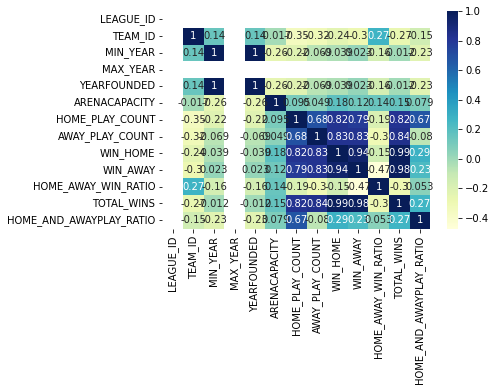

In [23]:
corr = teams.corr()

sb.heatmap(corr, cmap="YlGnBu", annot=True)

mp.show()

__En çok kazanan takımların bar chartı__

<AxesSubplot:ylabel='NICKNAME'>

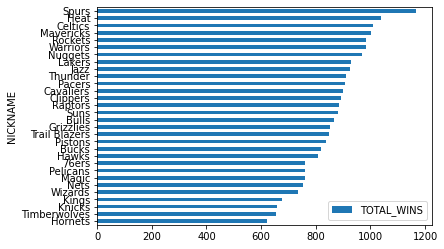

In [24]:
teams[["NICKNAME","TOTAL_WINS"]].sort_values("TOTAL_WINS", ascending=True).plot(kind="barh",x="NICKNAME", y="TOTAL_WINS")

__Evinde en çok kazanan takımlar bar chart__

<AxesSubplot:ylabel='NICKNAME'>

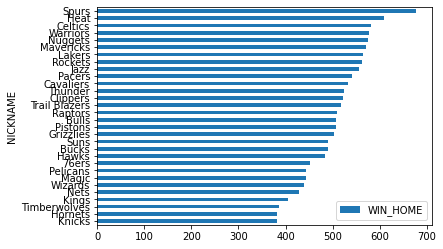

In [25]:
teams[["NICKNAME","WIN_HOME"]].sort_values("WIN_HOME", ascending=True).plot(kind="barh",x="NICKNAME", y="WIN_HOME")

__Toplam satır ve sütunlar__

In [26]:

sum(teams.shape)+sum(games.shape)+sum(game_details.shape)+sum(players.shape)+sum(ranking.shape)


880887